# Convolutional Neural Networks

<div class="alert alert-block alert-info">
This Python Notebook is based on <a href=https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.1-introduction-to-convnets.ipynb>https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.1-introduction-to-convnets.ipynb</a> and <a href=https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb>https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb</a>
</div>

In this notebook we will define a simple convolutional neural network to classify [MNIST digits](http://yann.lecun.com/exdb/mnist) and visualize the learned representation.

The network to be created will have 3 Convolutional layers (`Conv2D`). The first two `Conv2D` layers will be followed by a 2D Max Pooling (`MaxPooling2D`). After the last convolution, two fully connected layers (`Dense`) will be added.

You can check the Kera's documentation of the mentioned layers on the links below:
 - `Conv2D`: https://keras.io/layers/convolutional/#conv2d
 - `MaxPooling2D`: https://keras.io/layers/pooling/#maxpooling2d
 - `Dense`: https://keras.io/layers/core/#dense

First of all, we need to import keras:

In [1]:

# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 

## Exercise 1 - Building our network

As in the first tutorial, we will be using a Kera's sequential model.
 
To start building our neural network, we add the convolutional and max pooling layers.
It is important to note that a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this by passing the argument `input_shape=(28, 28, 1)` to our first convolutional layer.

The first `Conv2D` layer should have 32 filters of size 3 by 3, and specify its input shape. The second and the third `Conv2D` layers should have 32 filters of size 3 by 3.
Remember that the first two `Conv2D` layers should be followed by 2 by 2 `MaxPooling2D` layers. All `Conv2D` should have `relu` activation.

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

### PUT YOUR CODE HERE ###
# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(layers.Input((28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
### END ###

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Let's display the architecture of our convnet so far:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


You should see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width and height dimensions tend to shrink as we go deeper into the network. As expected, the number of channels is controlled by the corresponding argument passed to the `Conv2D` layers (e.g., 32 or 64).

The next step is to feed our last output tensor (of shape `(3, 3, 32)`) into a densely-connected classifier network (a stack of `Dense` layers) — such classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D using the `Flatten` layer (https://keras.io/layers/core/#flatten), and then add a few `Dense` layers on top. Use 64 units with ReLU activation function for the first fully-connected layer. Given that we are trying to solve a classification problem with 10 classes, define the last layer appropriately.

In [4]:
### PUT YOUR CODE HERE ###
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model.add(layers.Dense(10, activation='softmax'))
### END ###

<div class="alert alert-block alert-info">
Note the use of the softmax activation function for the last layer. Softmax converts outputs to values between 0 and 1 that sum to 1. The output thus follows the definition of a probability distribution. Softmax is a standard activation function for multi-class classification problems such as our digit classification task.  
</div>

Now we can check the shape of the output of the Flatten layer, which should be 1D.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

As you can see, our `(3, 3, 32)` outputs were flattened into vectors of shape `(288)`, before going through two `Dense` layers.

## Exercise 2 - Training the network

Now, let's train our convnet on (a reduced version of) the MNIST digits. First of all, the MNIST data set, which is embedded in Keras, is imported. Also, the `to_categorical` function is imported, which is helpful to convert the labels in the MNIST dataset (integers) into one-hot encodings.

If you are working on your own computer, modify the first line to:
```
from keras.datasets import mnist```

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))[:6000]
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))[:1000]
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:6000])
test_labels = to_categorical(test_labels[:1000])

Using TensorFlow backend.


The labels as loaded from the MNIST dataset are integers, but after applying the `to_categorical` function, each label becomes a vector with 10 elements, all of them 0 but the one corresponding to the right class. We can check the fist label of the training set:

In [7]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


You can now compile the model using the `rmsprop` optimizer and the `categorical_crossentropy` loss function. Then train the model for 5 epochs with batches of size 64 and evaluate it on the test data.

In [8]:
### PUT YOUR CODE HERE ###
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
### END ###

Train on 6000 samples
Epoch 1/5
6000/6000 [==============================] - 9s 2ms/sample - loss: 0.8757 - accuracy: 0.7200
Epoch 2/5
6000/6000 [==============================] - 9s 1ms/sample - loss: 0.2805 - accuracy: 0.9153
Epoch 3/5
6000/6000 [==============================] - 9s 1ms/sample - loss: 0.1807 - accuracy: 0.9453
Epoch 4/5
6000/6000 [==============================] - 9s 1ms/sample - loss: 0.1335 - accuracy: 0.9593
Epoch 5/5
1000/1000 [==============================] - 1s 586us/sample - loss: 0.1183 - accuracy: 0.9600


We can now see the final accuracy on the test set.

In [9]:
test_acc

0.96

# Visualizing what convnets learn

It is often said that deep learning models are "black boxes", learning representations that are difficult to extract and present in a human-readable form. While this is partially true for certain types of deep learning models, it is less the case for convnets. The representations learned by convnets are highly amenable to visualization, especially so when applied to visual tasks. Since 2013, a wide array of techniques have been developed for visualizing and interpreting these representations. We won't survey all of them, but we will cover two of the most accessible and useful ones:

* Visualizing intermediate convnet outputs ("intermediate activations"). This is useful to understand how successive convnet layers transform their input, and to get a first idea of the meaning of individual convnet filters.
* Visualizing convnets filters. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.

## Exercise 3 - Visualizing intermediate activations

Visualizing intermediate activations consists in displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its "activation", the output of the activation function). This gives a view into how an input is decomposed into the different filters learned by the network. These feature maps we want to visualize have 3 dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel, as a 2D image.

We will use as input an example of each digit that was not part of the training set:

In [10]:
img_tensor = test_images[[3, 2, 1, 18, 4, 8, 11, 0, 61, 7], :].reshape((10, 28, 28, 1))

Let's display our pictures. For that, we will use the helper function `plot_grid` that display a set of images following a grid layout (defined in plot_grid.py). The function expects a tensor of shape (nb_images, image_size, image_size) as its first and main argument.

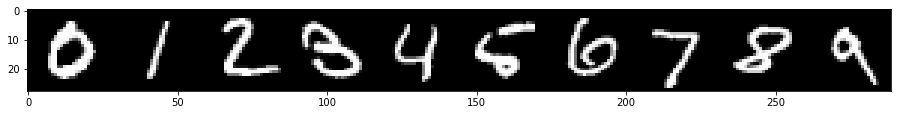

In [11]:
%matplotlib inline
from plot_grid import plot_grid
    
plot_grid(img_tensor.squeeze(), cmap='gray', images_per_row=10, scale=1.5)

In order to extract the feature maps we want to look at, we will create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we will use the Keras class `Model`. A `Model` is instantiated using two arguments: an input tensor (or list of input tensors), and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the `Sequential` models that you are familiar with, mapping the specified inputs to the specified outputs. What sets the `Model` class apart is that it allows for models with multiple outputs, unlike `Sequential`.

In [12]:
from tensorflow.keras import models

# Extracts the outputs of the top 5 layers:
layer_outputs = [layer.output for layer in model.layers[:5]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

When fed an image input, this model returns the values of the layer activations in the original model. This is the first time you encounter a multi-output model: until now the models you have seen only had exactly one input and one output. In the general case, a model could have any number of inputs and outputs. This one has one input and 5 outputs, one output per layer activation.

In [13]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

For instance, this is the activation of the first convolution layer for our 10 digits:

In [14]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(10, 26, 26, 32)


It's a 26x26 feature map with 32 channels. When can then display individual channels to see what they encode. Here is the result I obtain for the 2<sup>nd</sup> and the 29<sup>th</sup> channels of my model:

![Activation of layer 2](activation_1.png)

![Activation of layer 29](activation_2.png)

The first channel represented seems to have learned to encode "vertical bars" or something similar (note that your own channels may be different, since the specific filters learned by convolution layers are not deterministic). The second channel displayed looks like a "bottom edge" detector.

Try to display the 32 channels of the first layer of your model and see whether you can spot interesting patterns:

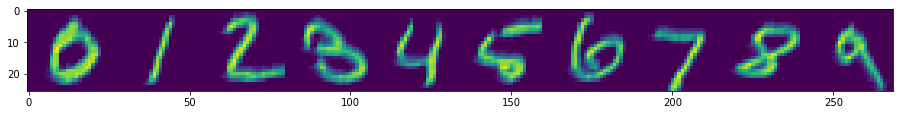

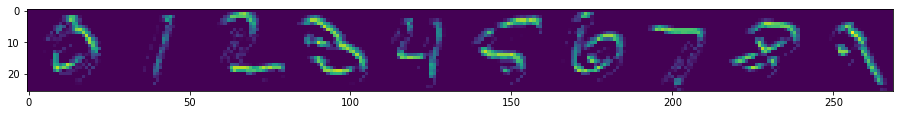

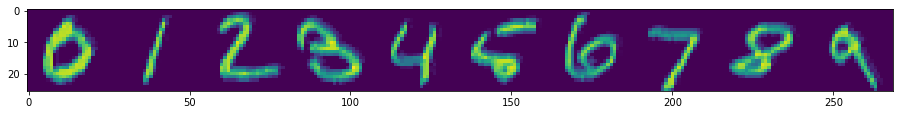

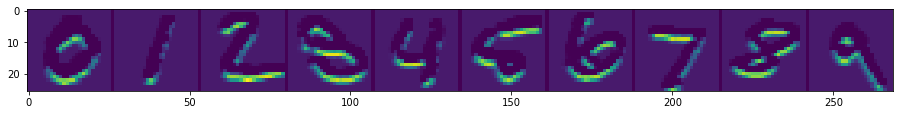

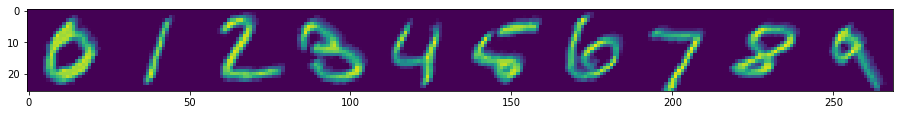

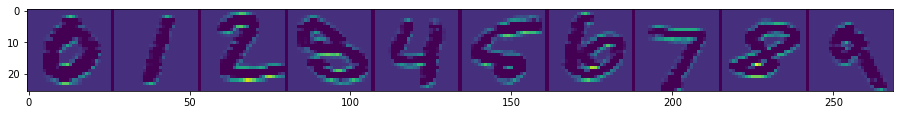

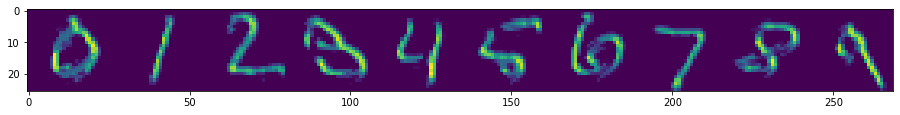

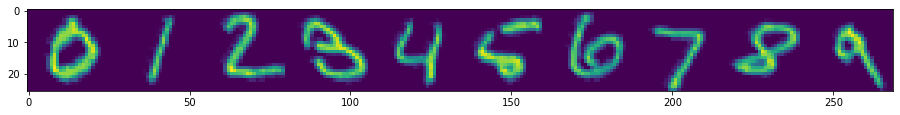

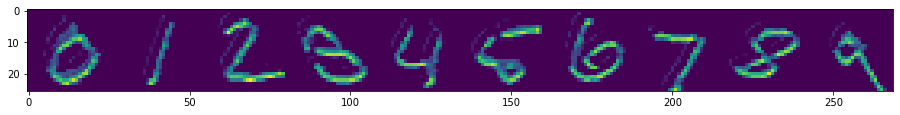

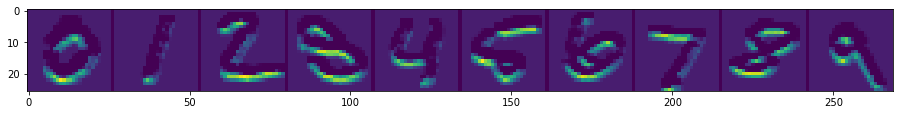

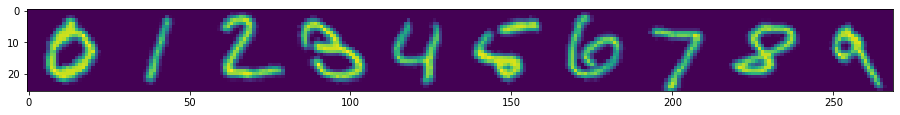

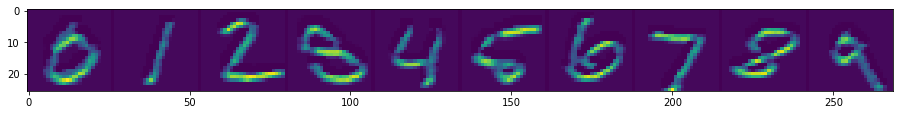

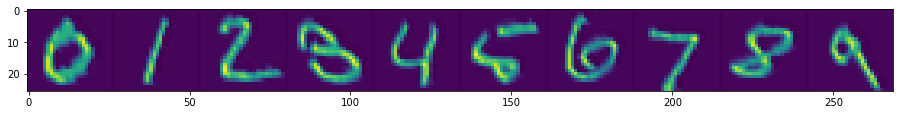

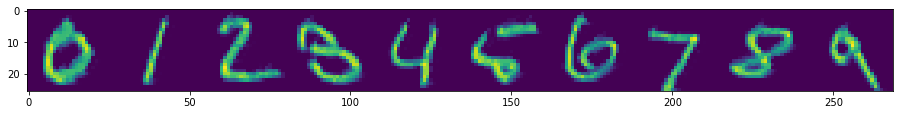

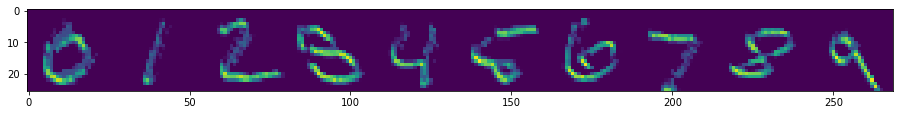

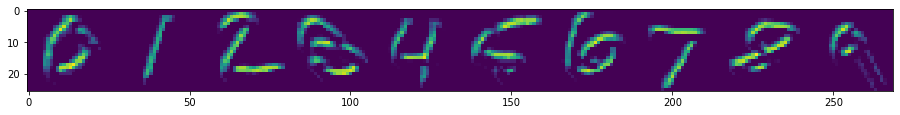

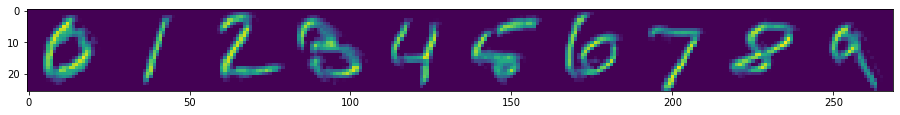

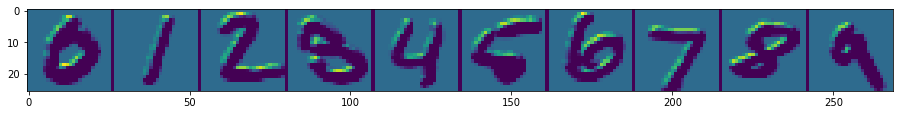

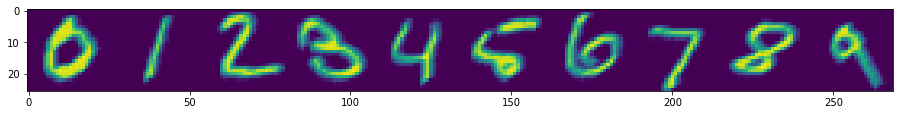

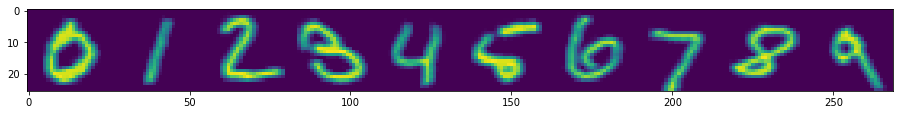

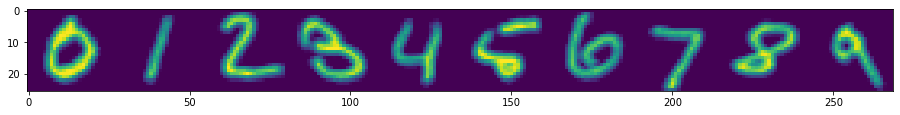

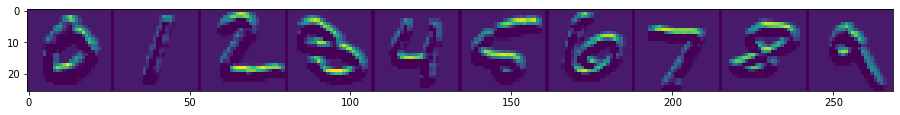

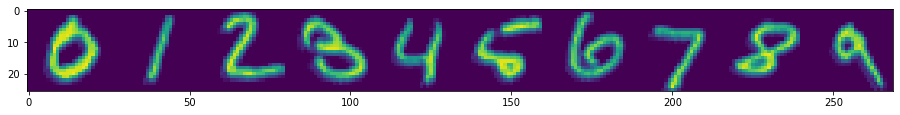

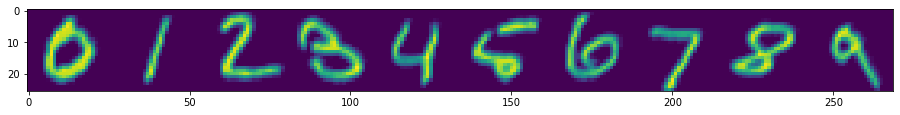

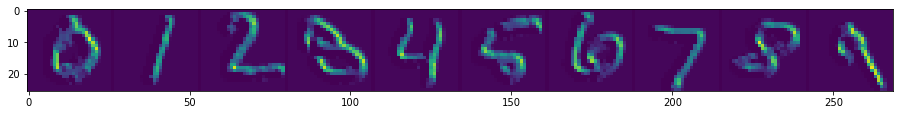

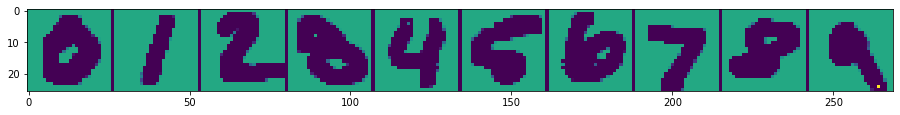

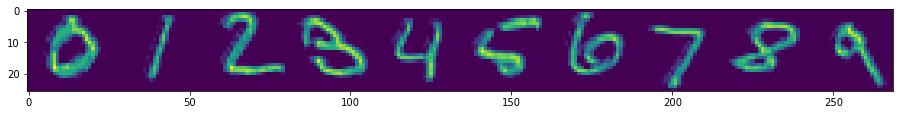

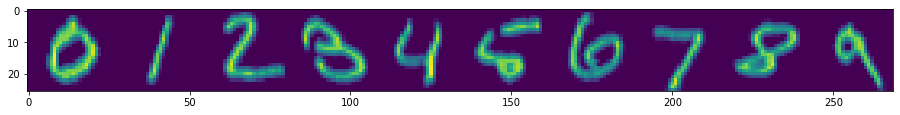

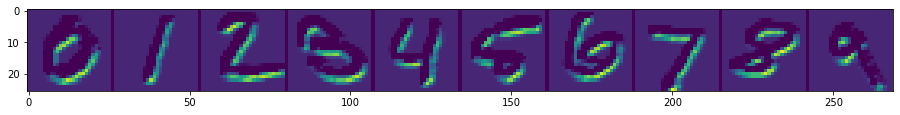

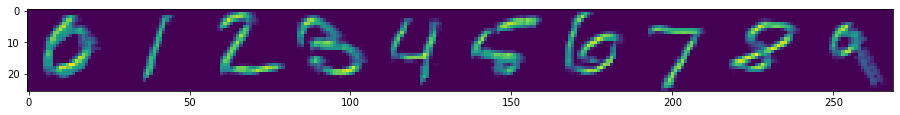

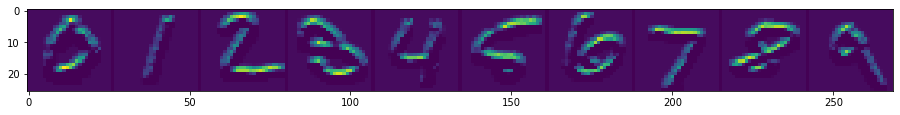

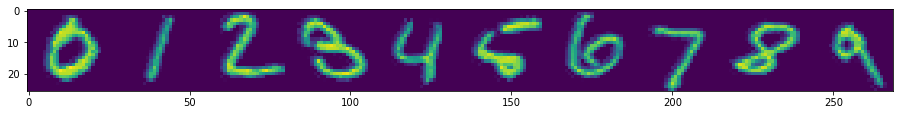

In [15]:
### PUT YOUR CODE HERE ###
for channel in range(first_layer_activation.shape[3]):
    plot_grid(first_layer_activation[:, :, :, channel], images_per_row=10, scale=1.5)
### END ###

At this point, let's go and plot a complete visualization of all the activations in the network. We will extract and plot every channel in each of our 5 activation maps, focusing on a single digit, with channels stacked side by side. 

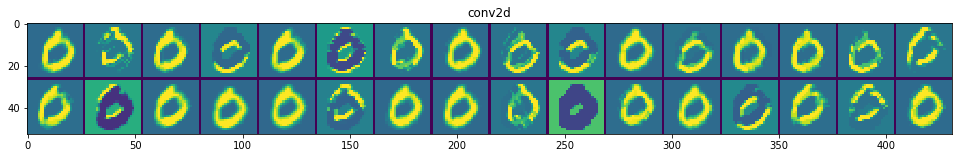

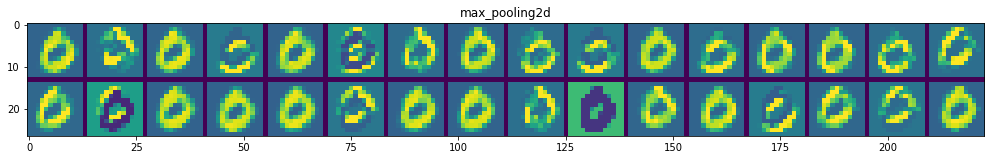

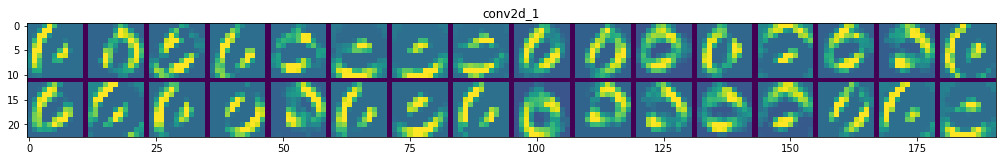

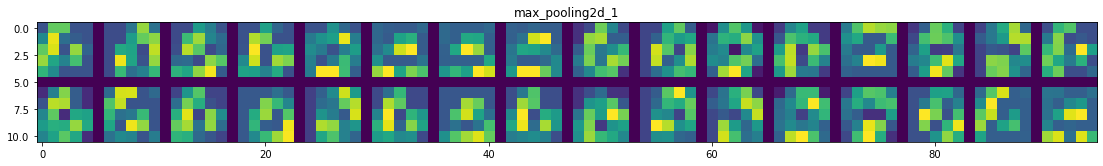

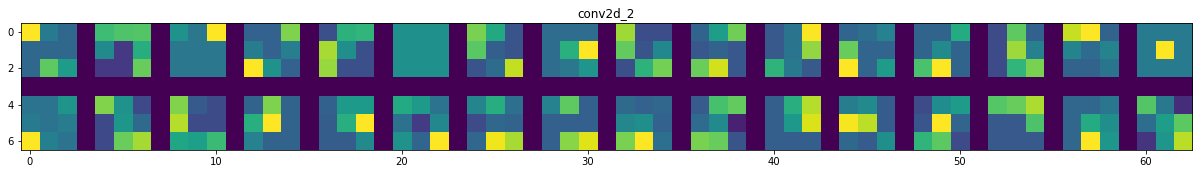

In [16]:
# These are the names of the layers, so that we can have them as part of our plot
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)

# Now let's display our feature maps
### PUT YOUR CODE HERE ###
for layer_name, layer_activation in zip(layer_names, activations):
    plot_grid(layer_activation[0].transpose(2, 0, 1), title=layer_name, postprocess=True)
### END ###

A few remarkable things to note here:

* The first layer acts as a collection of various edge detectors. At that stage, the activations are still retaining almost all of the information present in the initial picture.
* As we go higher-up in a convolutional neural network, the activations become increasingly abstract and less visually interpretable. They start encoding higher-level concepts, such as specific strokes here (e.g. vertical/horizontal bars, round shapes, ...). Higher-up representations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
* The sparsity of the activations is increasing with the depth of the layer: in the first layer, all filters are usually activated by the input image, but in the following layers more and more filters might be blank. This means that the pattern encoded by the filter isn't found in the input image.

We have just evidenced a very important universal characteristic of the representations learned by deep neural networks (not just CNNs): the features extracted by a layer get increasingly abstract with the depth of the layer. The activations of layers higher-up carry less and less information about the specific input being seen, and more and more information about the target (in our case, the class of the image: one of the 10 digits). A deep neural network effectively acts as an __information distillation pipeline__, with raw data going in (in our case, gray-level pictures), and getting repeatedly transformed so that irrelevant information gets filtered out (e.g. the specific visual appearance of the image) while useful information get magnified and refined (e.g. the class of the image).

This is analogous to the way humans and animals perceive the world: after observing a scene for a few seconds, a human can remember which abstract objects were present in it (e.g. bicycle, tree) but could not remember the specific appearance of these objects. In fact, if you tried to draw a generic bicycle from mind right now, chances are you could not get it even remotely right, even though you have seen thousands of bicycles in your lifetime. You brain has learned to completely abstract its visual input, to transform it into high-level visual concepts while completely filtering out irrelevant visual details, making it tremendously difficult to remember how things around us actually look.

## Exercise 4 - Visualizing convnet filters

Another easy thing to do to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to. This can be done with __gradient ascent in input space__: applying __gradient descent__ to the values of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. The resulting input image would be one that the chosen filter is maximally responsive to.

The process is simple: we will build a loss function that maximizes the value of a given filter in a given convolution layer, then we will use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value. For instance, here's a loss for the activation of filter 0 in the layer "conv2d_3":

To implement gradient descent, we will need the gradient of this loss with respect to the model's input. To do this, we will use the 
`gradients` function packaged with the `backend` module of Keras:

In [17]:
import tensorflow.keras.backend as K
import tensorflow as tf

def get_loss_and_gradient(image, layer_name, filter_index=0):
    with tf.GradientTape(persistent=True) as gtape:
        input_images =  tf.convert_to_tensor(image, dtype=tf.float32)#tf.constant(image.astype(np.float32))
        gtape.watch(input_images)
        model_ = tf.keras.models.Model(model.input, model.get_layer(layer_name).output)
        layer_output = model_(input_images)
        loss = K.sum(layer_output[:,:,:,filter_index])
        
    # The call to `gradient` returns a list of tensors (of size 1 in this case)
    # hence we only keep the first element -- which is a tensor.
    grads = gtape.gradient(loss, input_images)
    # We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
    grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
    return loss, grads


A non-obvious trick to use for the gradient descent process to go smoothly is to normalize the gradient tensor, by dividing it by its L2 norm (the square root of the average of the square of the values in the tensor). This ensures that the magnitude of the updates done to the input image is always within a same range.

Now we need a way to compute the value of the loss tensor and the gradient tensor, given an input image. 

In [18]:
import numpy as np

# Let's test it:
loss_value, grads_value = get_loss_and_gradient(np.random.rand(1, 28, 28, 1), 'conv2d_2', 3)


At this point we can define a Python loop to do stochastic gradient descent:

In [19]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 28, 28, 1)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = get_loss_and_gradient(input_img_data, 'conv2d_2')
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

The resulting image tensor will be a floating point tensor of shape `(1, 28, 28, 1)`, with values that may not be integer within `[0, 255]`. Hence we would need to post-process this tensor to turn it into a displayable image. The utility function `deprocess_image` (defined in `deprocess_image.py`) can do that for you.

Now we have all the pieces, let's put them together into a Python function that takes as input a layer name and a filter index, and that returns a valid image tensor representing the pattern that maximizes the activation the specified filter:

In [20]:
from deprocess_image import deprocess_image

def generate_pattern(layer_name, filter_index, size=28):
    ### PUT YOUR CODE HERE ###
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 1)) * 20 + 128.
    
    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(100):
        loss_value, grads_value = get_loss_and_gradient(input_img_data, layer_name, filter_index)
        
        #Update the input image
        input_img_data += grads_value * step
        
    img = input_img_data[0].numpy()
    
    return deprocess_image(img)
    ### END ###

Let's try this:

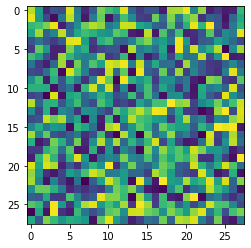

In [21]:
import matplotlib.pyplot as plt

plt.imshow(generate_pattern('conv2d_2', 3).squeeze())
plt.show()

For example, one of the filters I obtained was maximally responsive to a vertical bar in the top-center of the image:

![Pattern of one filter](filter.png)

Now the fun part: we can start visualising every single filter in every layer. Using `plot_grid` again, display the filters of each convolutional layer in a grid.

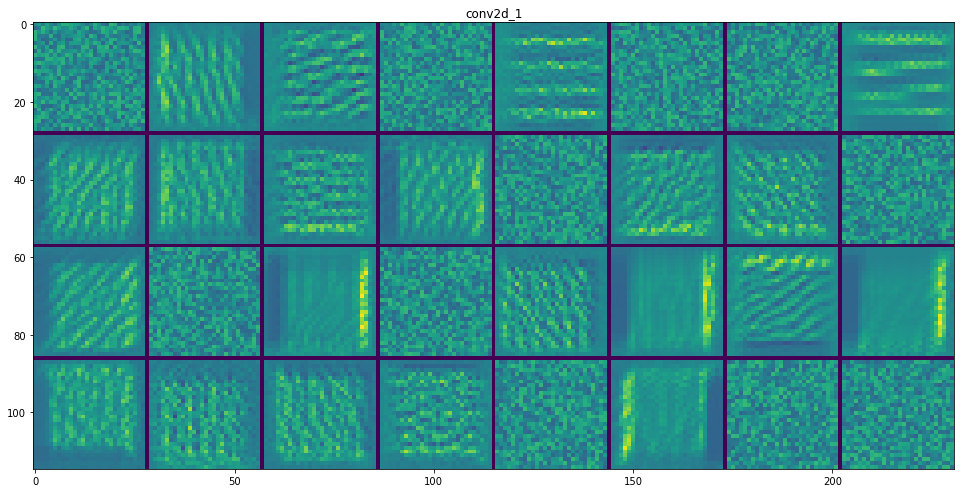

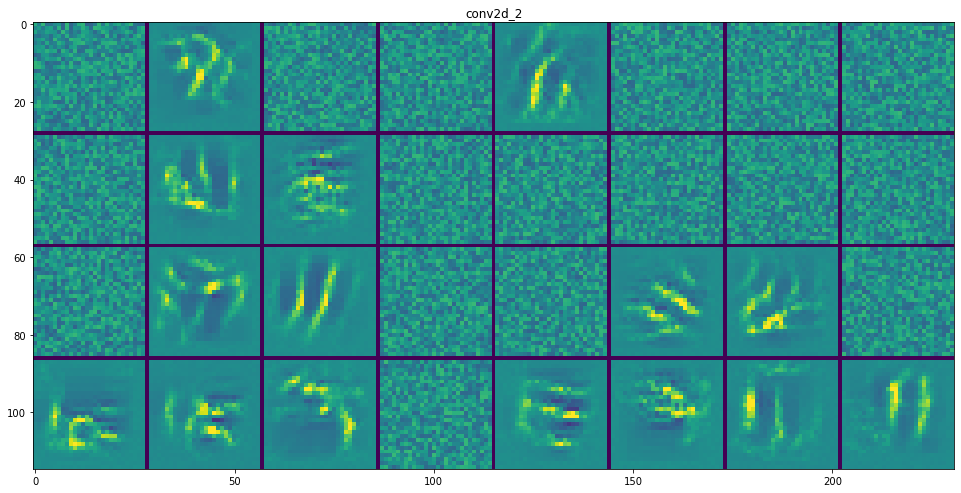

In [22]:
### PUT YOUR CODE HERE ###
for layer_name in ['conv2d_1', 'conv2d_2']:
    size = 28
    nb_filters = 32

    filter_img = np.zeros((nb_filters, size, size, 1))
    for f in range(nb_filters):  # iterate over the filter of a layer
            # Generate the pattern for filter `f` in `layer_name`
            filter_img[f] = generate_pattern(layer_name, f, size=size)

    # Display the results grid
    plot_grid(filter_img.squeeze(), title=layer_name, images_per_row=8, scale = 2)
### END ###

These filter visualizations tell us a lot about how convnet layers see the world: each layer in a convnet simply learns a collection of filters such that their inputs can be expressed as a combination of the filters. This is similar to how the Fourier transform decomposes signals into a bank of cosine functions. The filters in these convnet filter banks get increasingly complex and refined as we go higher-up in the model.

<div class="alert alert-block alert-info">
The notebook https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb, on which the second half of this tutorial is based, features the same analysis on a more complex model trained to categorize cats and dogs. Check it out to get an idea of the kind of representation learned when the input is more complex than gray-scale written digits.
</div>